# Open Street Map - *Geometry*
Geometry is an important aspect for OSM data, because this is actually something you can get here by using different query strategies.
There are 3D OSM geometries, however in this course we only focus on 0D, 1D and 2D geometries, which should be enough content.

So let us go through them - what is what:
- 0-D geometry is a point (represented by a 3-D coordinate (x, y, z))
- 1-D geometries are curves or lines (Having a start and an end coordinate)
- 2-D geometries (typically called *regions*, *polygons* or *surfaces*) are continuos connected 2-D point sets, delimited by curves (that is why you have to provide the first point of a polygon in GeoJSON again at the end)
- 3-D geometries are spatial objects such as buildings, they are not flat any more. Mathematically they are described by rigid bodies (a bounded, regular and semi-analytical subset of $R^3$). There are different schemas to represent solids, however the most common one used in GIS is boundary representation.

Even though I also mentioned 3-D geometries (for the sake of completeness) we are only looking into points, lines, and polygons. When we use *OSMnx* methods and functions for querying OSM data, take a look at the methods and functions naming, you will see the name already reveals what sort of data we are querying.

Using this geometry data we can create nice maps as for example a street network or a figure ground plan.

Before we get started, we need to import the necessary libraries.

In [14]:
import osmnx as ox
from IPython.display import Image

%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.1.0'

## Plot Aachen street network type
OpenStreetMap's data are useful to study urban form, networks, resilience, and accessibility. [Street network](https://geoffboeing.com/2017/04/urban-form-analysis-openstreetmap/) data especially when holding these cities at the same scale providing spatial objectivity in comparing urban forms. Comparing the following city networks (all cities a part of the rheinisch mining area) show essential differences and outline their uniqueness. 

![Street_Network](./img/streetNetwork.png)  

For the first plot we need to define the dpi, the size (make sure it is not too big, or it may take some time to be plotted) and of course a place. These are essential inputs for the plot_figure_ground method. But the map is not just visualized as the output here, but also saved as **aachen.png**. If parameters are unclear or unknown, have a look at the documentation, every parameter is described there.

2024-05-03 14:02:45 Got all network data within polygon from API in 1 request(s)
2024-05-03 14:02:45 Creating graph from downloaded OSM data...
2024-05-03 14:02:46 Created graph with 15030 nodes and 33348 edges
2024-05-03 14:02:46 Added length attributes to graph edges
2024-05-03 14:02:46 Identifying all nodes that lie outside the polygon...
2024-05-03 14:02:46 Created nodes GeoDataFrame from graph
2024-05-03 14:02:46 Created r-tree spatial index for 15030 geometries
2024-05-03 14:02:46 Identified 14172 geometries inside polygon
2024-05-03 14:02:47 Removed 667 nodes outside polygon
2024-05-03 14:02:47 Truncated graph by polygon
2024-05-03 14:02:47 Identifying all nodes that lie outside the polygon...
2024-05-03 14:02:47 Created nodes GeoDataFrame from graph
2024-05-03 14:02:47 Created r-tree spatial index for 14363 geometries
2024-05-03 14:02:47 Identified 8152 geometries inside polygon
2024-05-03 14:02:47 Removed 6079 nodes outside polygon
2024-05-03 14:02:48 Removed 0 isolated nodes


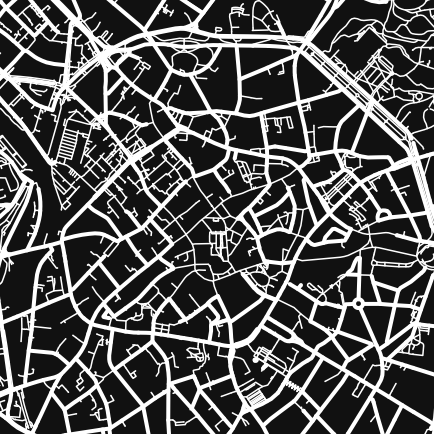

In [15]:
#Setting values for parameters
dpi=72
#By default this is in meters
size=600
place = "Aachen, Germany"
fp = f"./aachen.png"
#Querying OSM data using a city name
fig, ax = ox.plot_figure_ground(
    address=place,
    network_type="walk",
    filepath=fp,
    dpi=dpi,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

## Let us create a figure ground plan
Next step, creating a figure ground plan of Aachen. Therefore, we first have to set a centre point, a distance, and a tag. The function creates a GeoDataFrame of OSM with a distance to N, S, W, E. The short form *gdf* stands for GeoDataFrame.

In [10]:
#Defining required tags for quering OSM
tags={"building":True}
point = (50.775593, 6.082478)
size = 500
dist = 1000
#OSMnx method geometries_from_point queryies OSM data using a point
gdf = ox.geometries_from_point(point, tags, dist=dist)
gdf_proj = ox.project_gdf(gdf)

In [11]:
gdf.head()

addr:city addr:housenumber addr:postcode  \
element_type osmid                                                 
node         3197800212       NaN              NaN           NaN   
             4962495741       NaN              NaN           NaN   
way          8068434       Aachen            38-40         52062   
             8600644       Aachen               44         52062   
             8600646       Aachen               48         52062   

                           addr:street  \
element_type osmid                       
node         3197800212            NaN   
             4962495741            NaN   
way          8068434             Markt   
             8600644     Monheimsallee   
             8600646     Monheimsallee   

                                                                  geometry  \
element_type osmid                                                           
node         3197800212                           POINT (6.07873 50.77810)   
             4962495741                           POINT (6.08606 50.78253)   
way          8068434     POLYGON ((6.08422 50.77600, 6.08410 50.77600, ...   
             8600644     POLYGON ((6.09272 50.78156, 6.09275 50.78158, ...   
             8600646     POLYGON ((6.09111 50.78204, 6.09116 50.78201, ...   

                                   amenity barrier maxheight  \
element_type osmid                                             
node         3197800212                NaN     NaN       NaN   
             4962495741                NaN     NaN       NaN   
way          8068434              townhall     NaN       NaN   
             8600644                   NaN     NaN       NaN   
             8600646     conference_centre     NaN       NaN   

                                                               description  \
element_type osmid                                                           
node         3197800212  Lernraum im SuperC mit 268 Arbeitsplätzen. Zug...   
             4962495741                                                NaN   
way          8068434                                                   NaN   
             8600644                                                   NaN   
             8600646                                                   NaN   

                        access  ... ramp:wheelchair roof:type:height  \
element_type osmid              ...                                    
node         3197800212    yes  ...             NaN              NaN   
             4962495741    NaN  ...             NaN              NaN   
way          8068434       NaN  ...             NaN              NaN   
             8600644       NaN  ...             NaN              NaN   
             8600646       NaN  ...             NaN              NaN   

                        contact:twitter reservation disused:healthcare stairs  \
element_type osmid                                                              
node         3197800212             NaN         NaN                NaN    NaN   
             4962495741             NaN         NaN                NaN    NaN   
way          8068434                NaN         NaN                NaN    NaN   
             8600644                NaN         NaN                NaN    NaN   
             8600646                NaN         NaN                NaN    NaN   

                        ways type defensive_works scout  
element_type osmid                                       
node         3197800212  NaN  NaN             NaN   NaN  
             4962495741  NaN  NaN             NaN   NaN  
way          8068434     NaN  NaN             NaN   NaN  
             8600644     NaN  NaN             NaN   NaN  
             8600646     NaN  NaN             NaN   NaN  

[5 rows x 286 columns]

The output shows, that in the column geometry polygons show up. The function plot_footprints takes these polygons to create the footprints of the buildings. The figure-ground diagrams are essential when representing the relationship between the build and unbuild space. The probably most known example is the **Nolli Map** of Rome.

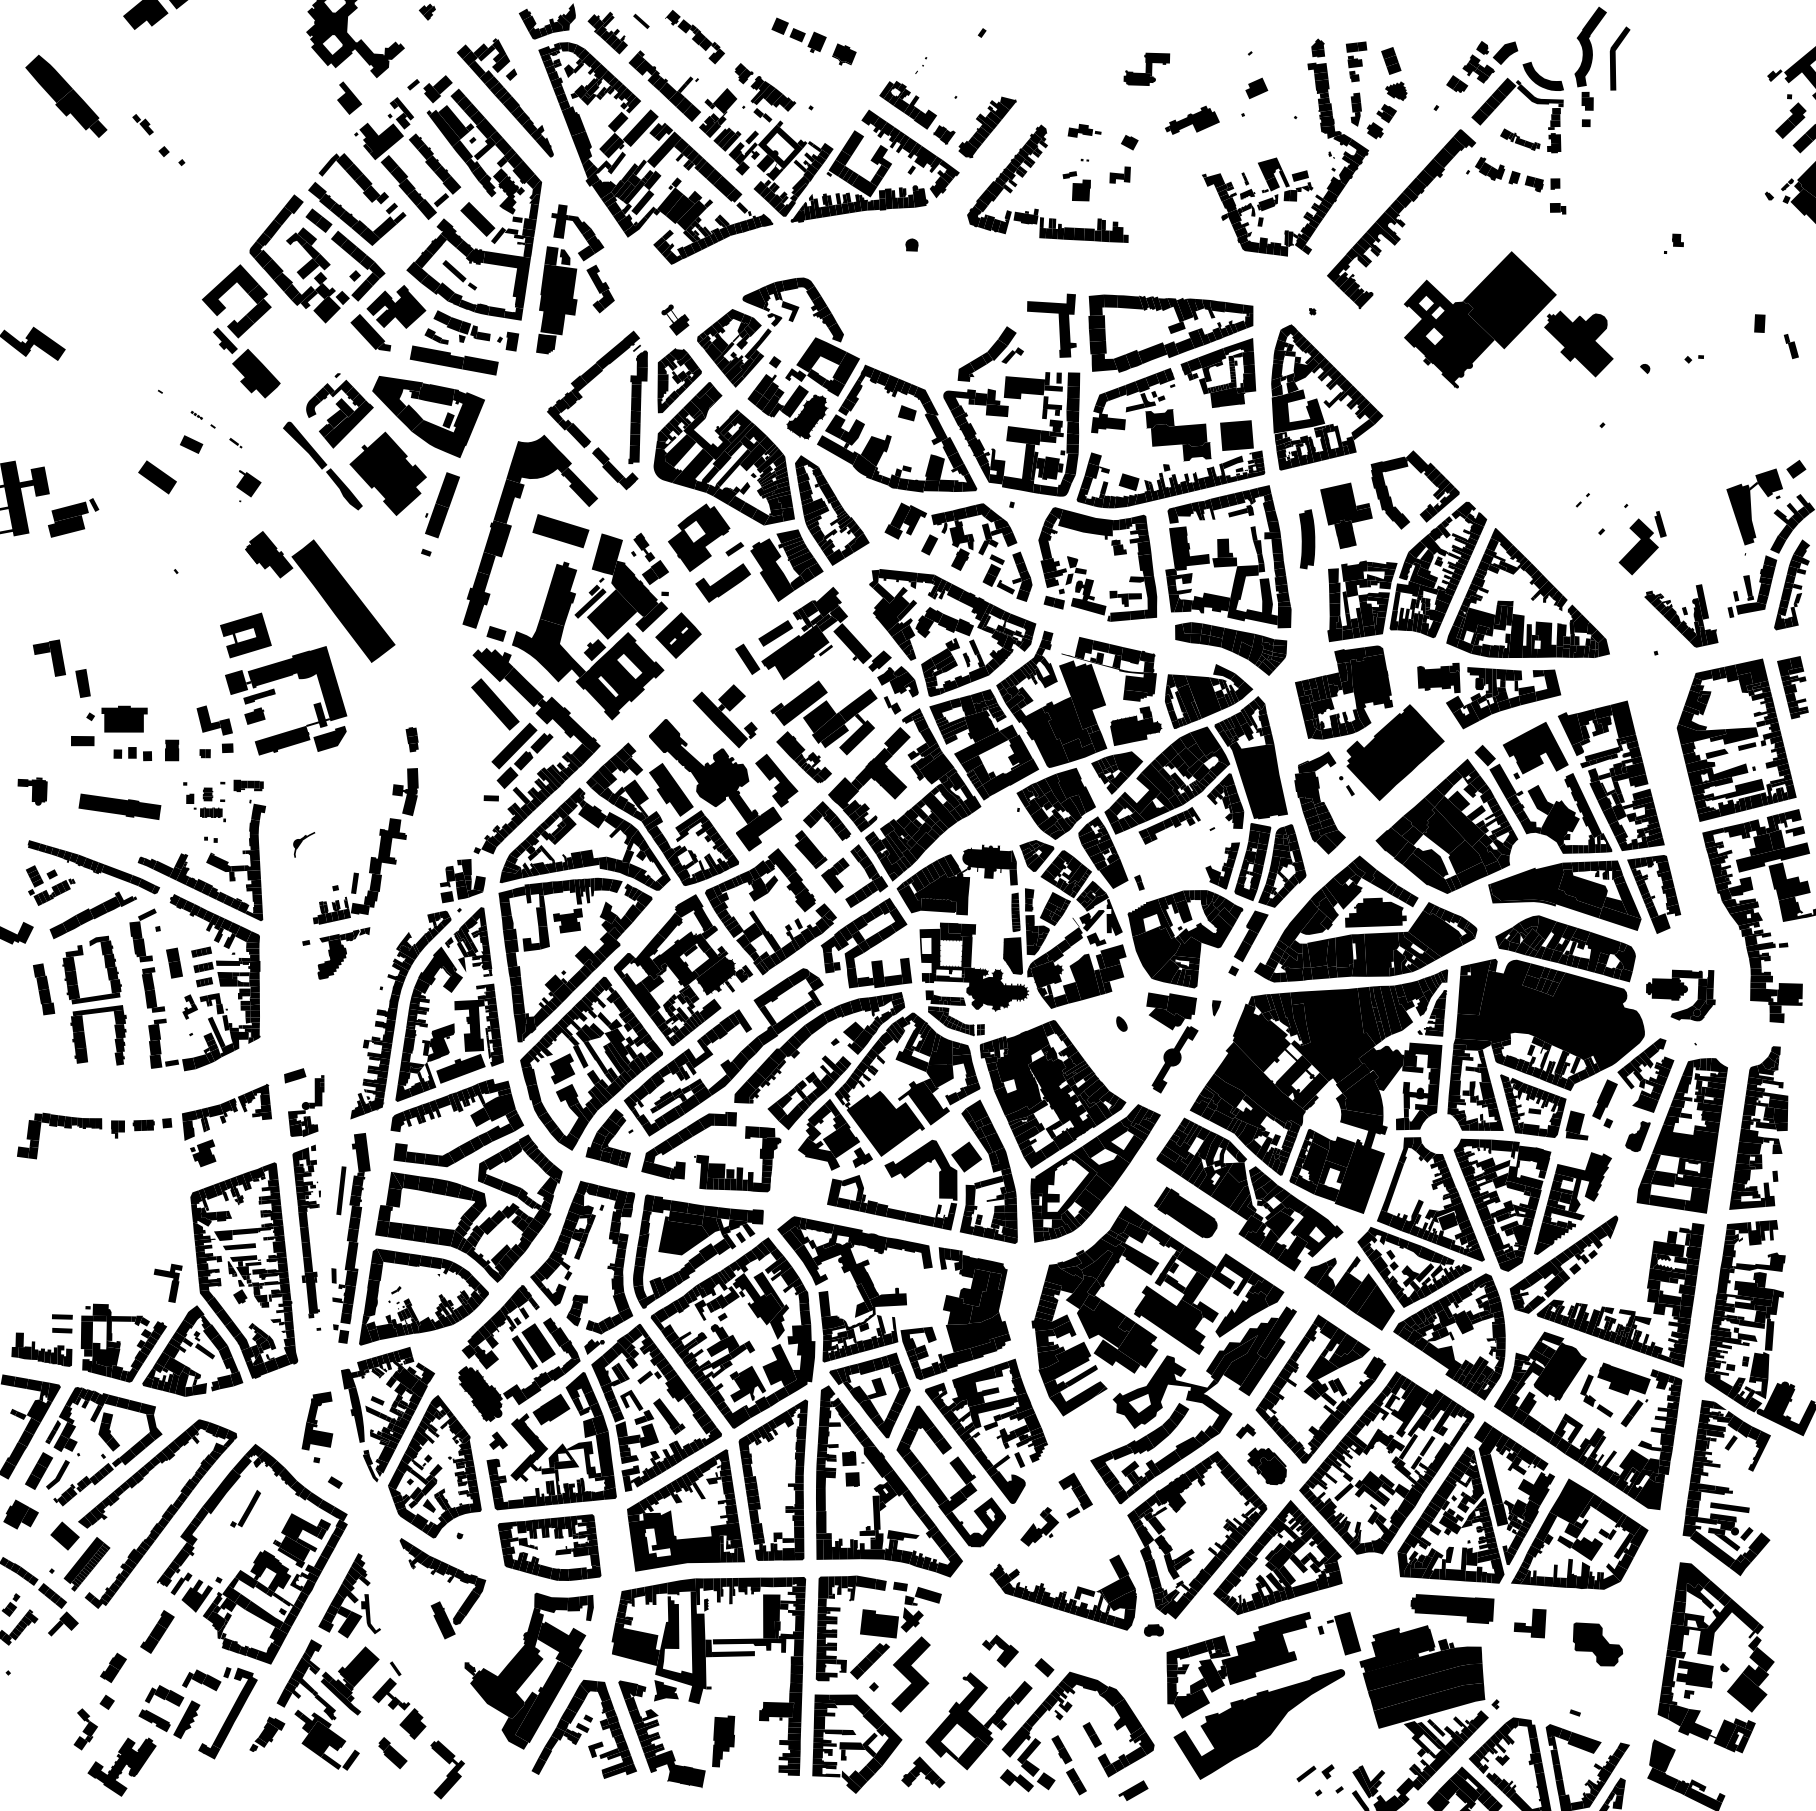

In [12]:
#Quering OSM by using the defined point
bbox = ox.utils_geo.bbox_from_point(point=point, dist=dist, project_utm=True)
fp = f"./aachen_schwarzplan.png"
#Generating figure ground plan 
fig, ax = ox.plot_footprints(
    gdf_proj,
    bbox=bbox,
    bgcolor="white",
    color="black",
    filepath=fp,
    dpi=300,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

In [13]:
bbox

(5629968.3942651795, 5627889.676069691, 295352.2106125074, 293268.31640742393)

### Exercise
Create a figure ground plan for your hometown or a city by choice, choose a suitable size.

## Further data filtering
Next, we analyse our information by slicing the GeoDataFrame. We take out specific information of *amenity* and *building*. We also get the geolocation (coordinates) of two specific buildings in Aachen *Reiff museum* and *Aachen central station*.

In [ ]:
gdf.head()

In [ ]:
#Extracting and reducing data from the DataFrame by slicing
gdf['amenity'].unique()

In [ ]:
#Extracting all elements with amenity cafe
gdf[gdf ["amenity"] == "cafe"].head()

In [ ]:
#Extracting and reducing data from the DataFrame by slicing
gdf['building'].unique()

In [ ]:
#Extracting all elements which are university buildings
gdf[gdf['building'] == "university"].plot()

In [ ]:
#Quering the exact geopoint of the two places in Aachen
reiff = ox.geocode("reiff museum aachen")
hbf = ox.geocode("Aachen Hauptbahnhof")
reiff

In [ ]:
#Get the geometry from buildings in a distance of 100 around the first place
rdf = ox.geometries_from_point(reiff, tags={"building":True},dist=100)
rdf.head()

In [ ]:
fig = rdf.plot()

### Exercise
Add another path, for example, from the Aachen university hospital to the Aachen city hall. You are welcome to choose another path, but the map must be extended and for practise do not reuse *Reiff* and *Hbf*. Print both the existing and the new path in one map, use different colours. Hint: Checkout the OSMnx documentation for functions such as plot_graph_route().  